Handwritten Digit Recognition (CNN)

In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, utils, models

Load the MNIST handwritten digit dataset

In [2]:
mnist = datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()  

In [3]:
# Normalize the training and testing data (scale pixel values to range between 0 and 1)
x_train = utils.normalize(x_train, axis = 1)
x_test = utils.normalize(x_test, axis = 1)

Model Training

In [4]:
# Define a sequential model architecture
model = models.Sequential()

In [5]:
# Add a convolutional layer
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# Add a max pooling layer to reduce the dimensionality of the data
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with a rate of 0.25 to prevent overfitting
model.add(layers.Dropout(rate=0.25))

C:\Users\kgabani\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
# Flatten the input layer to transform 28x28 pixel images into a single feature vector
model.add(layers.Flatten(input_shape=(28, 28)))

# Add a hidden dense layer with 128 neurons and ReLU activation
model.add(layers.Dense(units=128, activation='relu'))

# Add another hidden dense layer with 128 neurons and ReLU activation
model.add(layers.Dense(units=128, activation='relu'))

# Add the output layer with 10 neurons (one for each digit class) and softmax activation for probability distribution
model.add(layers.Dense(units=10, activation='softmax'))

C:\Users\kgabani\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Summery
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 608,586 (2.32 MB)

 Trainable params: 608,586 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model by specifying the optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Fit the data to a trained model

In [9]:
# Train the model on the training data 
history = model.fit(x_train,y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8930 - loss: 0.3563
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9779 - loss: 0.0699
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9850 - loss: 0.0476
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9889 - loss: 0.0355
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9913 - loss: 0.0276
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9925 - loss: 0.0229
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9932 - loss: 0.0201
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9949 - loss: 0.0155
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9953 - loss: 0.0137
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9952 - loss: 0.0131
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9962 - loss: 0.0111
Epoch 12/15
1875/18

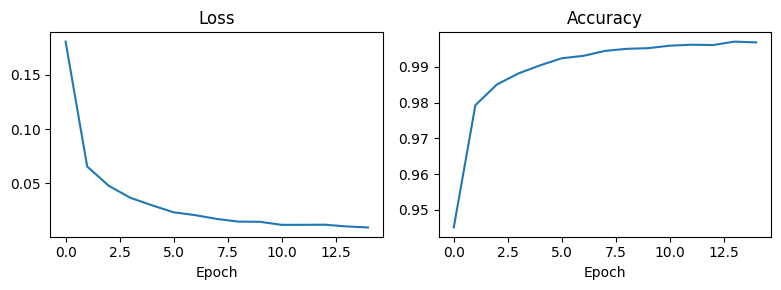

In [10]:
# Plot Loss and Accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

ax1.plot(history.history['loss'])
ax1.set_title('Loss')
ax1.set_xlabel('Epoch')

ax2.plot(history.history['accuracy'])
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')

plt.tight_layout()
plt.show()

Evaluate the model

In [11]:
# Evaluate the model's performance on the test data
loss , accuracy = model.evaluate(x_test,y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9858 - loss: 0.0758
Test Loss: 0.0617, Test Accuracy: 0.9879


In [12]:
# Save the trained model
model.save('handwritten_digit_model.keras')

Test the Model

In [13]:
# Load the saved model
model = models.load_model('handwritten_digit_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
---------------------------
The predicted value is :  3


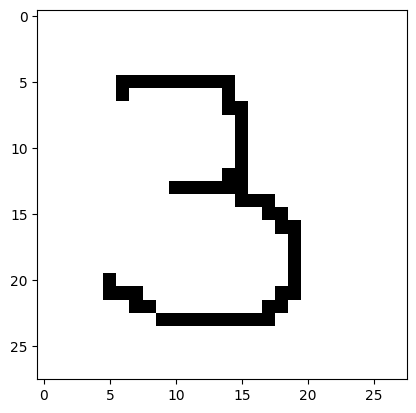

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
---------------------------
The predicted value is :  4


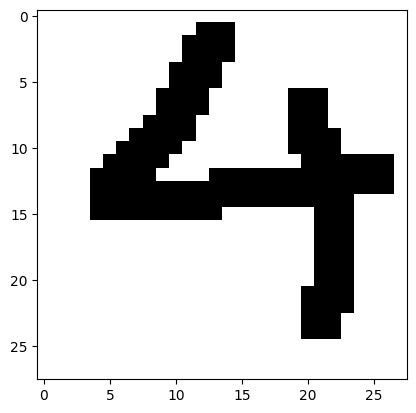

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
---------------------------
The predicted value is :  7


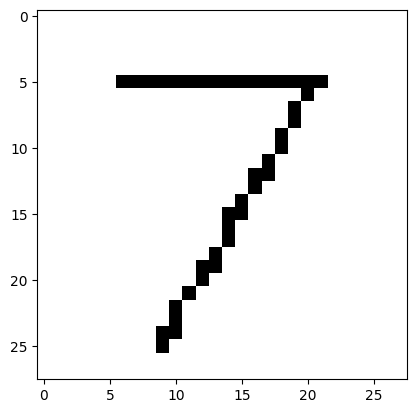

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
---------------------------
The predicted value is :  0


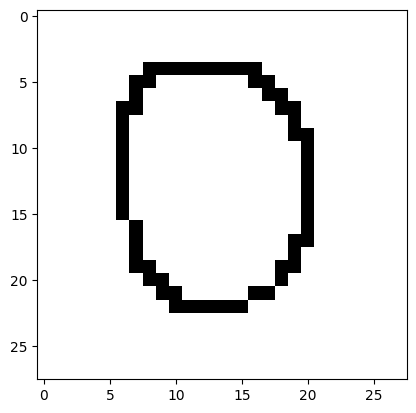

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
---------------------------
The predicted value is :  8


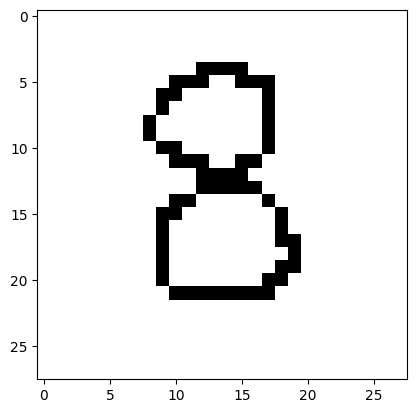

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
---------------------------
The predicted value is :  5


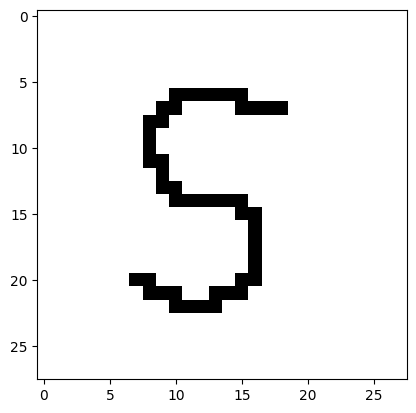

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
---------------------------
The predicted value is :  8


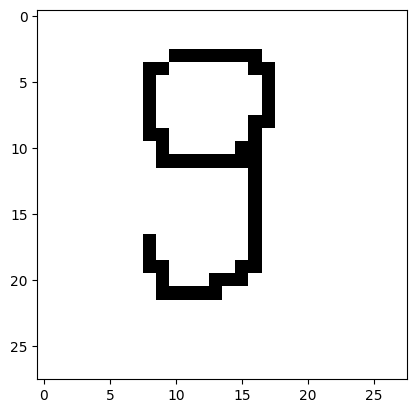

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
---------------------------
The predicted value is :  1


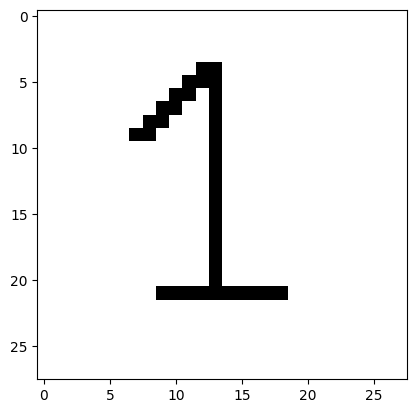

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
---------------------------
The predicted value is :  2


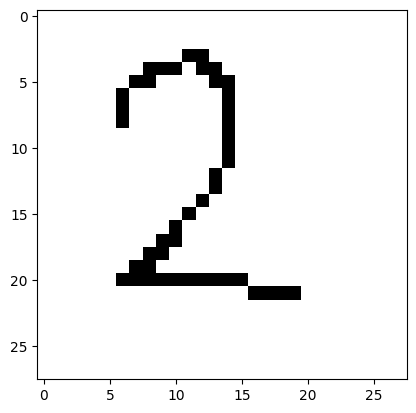

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
---------------------------
The predicted value is :  1


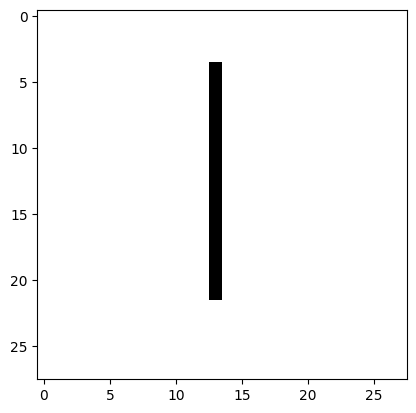

In [14]:
for x in range(1,11):
    # Read image
    img=cv2.imread(f'digits/{x}.png')[:,:,0]
    # Invert for black digits on white background
    img=np.invert(np.array([img]))
    # Predict
    prediction=model.predict(img)
    print("---------------------------")
    print("The predicted value is : ",np.argmax(prediction))
    # Show image
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()

Summary

In [ ]:
# The convolutional layers with ReLU activation extract features from the images, 
# the pooling layer reduces dimensionality, 
# the dropout layer prevents overfitting, 
# the flatten layer prepares the data for fully connected layers, and 
# the final dense layer with softmax activation predicts the class probabilities for each digit.